# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

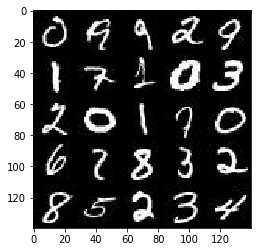

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

In [ ]:
show_n_images = 16

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    input_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='input_real')
    
    input_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    
    learning_rate = tf.placeholder(tf.float32, None, name='learning_rate')
    
    return input_real, input_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


In [28]:
def leaky_relu(x, alpha=0.1, name='leaky_relu'): 
    return tf.maximum(x, alpha * x, name=name)

### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [29]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    #alpha = 0.2
    keep_prob=0.5
    with tf.variable_scope('discriminator', reuse=reuse):
        
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='SAME', kernel_initializer=tf.contrib.layers.xavier_initializer())
        relu1 = leaky_relu(x1)
     
        
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='SAME', kernel_initializer=tf.contrib.layers.xavier_initializer())
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = leaky_relu(bn2)
        
        
        
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='SAME', kernel_initializer=tf.contrib.layers.xavier_initializer())
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = leaky_relu(bn3)
     

        flat = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        do = tf.layers.dropout(out, keep_prob, training=True)
        
        return do, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [30]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    alpha = 0.2
    with tf.variable_scope('generator', reuse=not is_train):
    
        x1 = tf.layers.dense(z, 7*7*512)
        x1 = tf.reshape(x1, (-1, 7,7, 512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = leaky_relu(x1)
      
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=1, padding='SAME', kernel_initializer=tf.contrib.layers.xavier_initializer())
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = leaky_relu(x2)
   
        x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides=2, padding='SAME', kernel_initializer=tf.contrib.layers.xavier_initializer())
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = leaky_relu(x3)
    
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=2, padding='SAME', kernel_initializer=tf.contrib.layers.xavier_initializer())
      
        out = tf.tanh(logits)
   
        return out



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [31]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    gen_model = generator(input_z, out_channel_dim)
    
    dis_model_real, dis_logits_real = discriminator(input_real)
    
    dis_model_fake, dis_logits_fake = discriminator(gen_model, reuse=True)
    
    dis_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=dis_logits_real, labels=tf.ones_like(dis_logits_real) * 0.9))
    
    dis_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=dis_logits_fake, labels=tf.zeros_like(dis_logits_fake)))
    
    dis_loss = dis_loss_real + dis_loss_fake
    
    gen_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=dis_logits_fake, labels=tf.ones_like(dis_logits_fake)))
    
    return dis_loss, gen_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [32]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS, scope='generator')
    
    #with tf.control_dependencies(update_ops):
        
    t_vars = tf.trainable_variables()

    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]

    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
    
    with tf.control_dependencies(update_ops):
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [33]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [ ]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    
    out_channel_dim = 3 if data_image_mode == "RGB" else 1
    
    input_real, input_z, l_rate = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    
    d_loss, g_loss = model_loss(input_real, input_z, out_channel_dim)
    
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    saver = tf.train.Saver()
    
    losses = []
    
    iteration = 0
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                
                # TODO: Train Model
                iteration += 1
                batch_images *= 2
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                _ = sess.run(d_train_opt, feed_dict={input_real: batch_images, input_z: batch_z})
                _ = sess.run(g_train_opt, feed_dict={input_real: batch_images, input_z: batch_z})
                
                if iteration % 10 == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    losses.append((train_loss_d, train_loss_g))
                    
                    print("Epoch {}/{}, iteration {}:".format(epoch_i + 1, epochs, iteration),
                          "Discriminator Loss: {:.4f},".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

                if iteration % 100 == 0:
                     show_generator_output(sess, 16, input_z, out_channel_dim, data_image_mode)

        saver.save(sess, './checkpoints/generator.ckpt')
        
    
    
    return losses
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2, iteration 10: Discriminator Loss: 1.4619, Generator Loss: 0.4558
Epoch 1/2, iteration 20: Discriminator Loss: 2.8562, Generator Loss: 0.1280
Epoch 1/2, iteration 30: Discriminator Loss: 1.6329, Generator Loss: 0.4062
Epoch 1/2, iteration 40: Discriminator Loss: 1.1999, Generator Loss: 0.8254
Epoch 1/2, iteration 50: Discriminator Loss: 1.4957, Generator Loss: 0.6924
Epoch 1/2, iteration 60: Discriminator Loss: 1.5272, Generator Loss: 0.6272
Epoch 1/2, iteration 70: Discriminator Loss: 1.2976, Generator Loss: 0.6117
Epoch 1/2, iteration 80: Discriminator Loss: 1.0443, Generator Loss: 0.9520
Epoch 1/2, iteration 90: Discriminator Loss: 1.2461, Generator Loss: 0.6885
Epoch 1/2, iteration 100: Discriminator Loss: 1.5098, Generator Loss: 0.4539


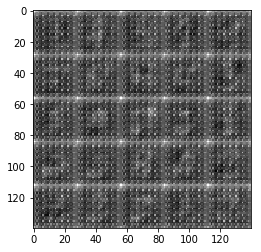

Epoch 1/2, iteration 110: Discriminator Loss: 1.3196, Generator Loss: 0.6185
Epoch 1/2, iteration 120: Discriminator Loss: 1.3099, Generator Loss: 0.5927
Epoch 1/2, iteration 130: Discriminator Loss: 1.1171, Generator Loss: 0.8867
Epoch 1/2, iteration 140: Discriminator Loss: 1.3929, Generator Loss: 0.4905
Epoch 1/2, iteration 150: Discriminator Loss: 1.1477, Generator Loss: 0.7363
Epoch 1/2, iteration 160: Discriminator Loss: 1.0026, Generator Loss: 1.0842
Epoch 1/2, iteration 170: Discriminator Loss: 1.3132, Generator Loss: 1.9786
Epoch 1/2, iteration 180: Discriminator Loss: 1.0061, Generator Loss: 1.4166
Epoch 1/2, iteration 190: Discriminator Loss: 0.9714, Generator Loss: 1.2320
Epoch 1/2, iteration 200: Discriminator Loss: 0.9772, Generator Loss: 1.4609


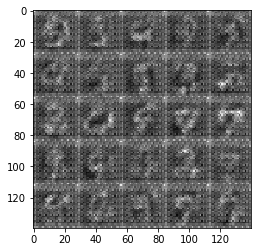

Epoch 1/2, iteration 210: Discriminator Loss: 0.9575, Generator Loss: 1.0360
Epoch 1/2, iteration 220: Discriminator Loss: 0.9988, Generator Loss: 1.1734
Epoch 1/2, iteration 230: Discriminator Loss: 0.9571, Generator Loss: 1.0141
Epoch 1/2, iteration 240: Discriminator Loss: 0.9073, Generator Loss: 1.1000
Epoch 1/2, iteration 250: Discriminator Loss: 1.3506, Generator Loss: 0.5012
Epoch 1/2, iteration 260: Discriminator Loss: 1.0094, Generator Loss: 0.9158
Epoch 1/2, iteration 270: Discriminator Loss: 1.0176, Generator Loss: 1.1361
Epoch 1/2, iteration 280: Discriminator Loss: 1.4161, Generator Loss: 0.4586
Epoch 1/2, iteration 290: Discriminator Loss: 0.9813, Generator Loss: 1.1709
Epoch 1/2, iteration 300: Discriminator Loss: 1.7208, Generator Loss: 2.8763


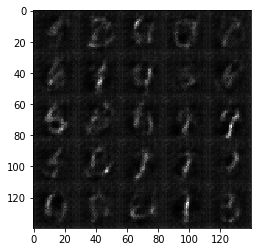

Epoch 1/2, iteration 310: Discriminator Loss: 1.0229, Generator Loss: 0.8069
Epoch 1/2, iteration 320: Discriminator Loss: 0.9753, Generator Loss: 1.1525
Epoch 1/2, iteration 330: Discriminator Loss: 1.5237, Generator Loss: 2.3628
Epoch 1/2, iteration 340: Discriminator Loss: 1.1158, Generator Loss: 1.4331
Epoch 1/2, iteration 350: Discriminator Loss: 1.0271, Generator Loss: 1.2730
Epoch 1/2, iteration 360: Discriminator Loss: 1.1676, Generator Loss: 1.5382
Epoch 1/2, iteration 370: Discriminator Loss: 1.1281, Generator Loss: 0.7507
Epoch 1/2, iteration 380: Discriminator Loss: 1.4223, Generator Loss: 0.4606
Epoch 1/2, iteration 390: Discriminator Loss: 1.0869, Generator Loss: 0.8547
Epoch 1/2, iteration 400: Discriminator Loss: 1.2479, Generator Loss: 0.6048


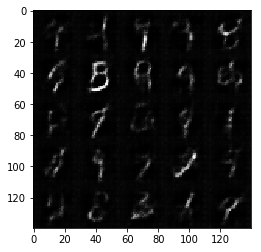

Epoch 1/2, iteration 410: Discriminator Loss: 1.2856, Generator Loss: 0.5878
Epoch 1/2, iteration 420: Discriminator Loss: 1.2839, Generator Loss: 1.6821
Epoch 1/2, iteration 430: Discriminator Loss: 1.0926, Generator Loss: 1.4256
Epoch 1/2, iteration 440: Discriminator Loss: 1.1202, Generator Loss: 1.3920
Epoch 1/2, iteration 450: Discriminator Loss: 1.0906, Generator Loss: 1.1502
Epoch 1/2, iteration 460: Discriminator Loss: 1.0204, Generator Loss: 1.3315
Epoch 2/2, iteration 470: Discriminator Loss: 1.0883, Generator Loss: 1.6480
Epoch 2/2, iteration 480: Discriminator Loss: 1.1054, Generator Loss: 1.5962
Epoch 2/2, iteration 490: Discriminator Loss: 1.3589, Generator Loss: 0.4887
Epoch 2/2, iteration 500: Discriminator Loss: 1.1484, Generator Loss: 1.4239


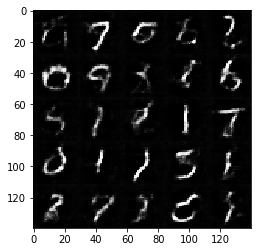

Epoch 2/2, iteration 510: Discriminator Loss: 1.0695, Generator Loss: 1.1415
Epoch 2/2, iteration 520: Discriminator Loss: 1.1503, Generator Loss: 1.6731
Epoch 2/2, iteration 530: Discriminator Loss: 1.3734, Generator Loss: 0.4914
Epoch 2/2, iteration 540: Discriminator Loss: 1.0833, Generator Loss: 0.8013
Epoch 2/2, iteration 550: Discriminator Loss: 1.2318, Generator Loss: 0.6245
Epoch 2/2, iteration 560: Discriminator Loss: 1.3061, Generator Loss: 1.6774
Epoch 2/2, iteration 570: Discriminator Loss: 1.1416, Generator Loss: 0.7454
Epoch 2/2, iteration 580: Discriminator Loss: 1.5475, Generator Loss: 0.3944
Epoch 2/2, iteration 590: Discriminator Loss: 1.2122, Generator Loss: 0.6329
Epoch 2/2, iteration 600: Discriminator Loss: 1.3874, Generator Loss: 0.4794


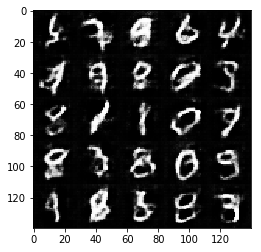

Epoch 2/2, iteration 610: Discriminator Loss: 1.1768, Generator Loss: 0.6999
Epoch 2/2, iteration 620: Discriminator Loss: 1.1030, Generator Loss: 1.2558
Epoch 2/2, iteration 630: Discriminator Loss: 1.0444, Generator Loss: 1.1519
Epoch 2/2, iteration 640: Discriminator Loss: 1.7675, Generator Loss: 2.1417
Epoch 2/2, iteration 650: Discriminator Loss: 1.0672, Generator Loss: 0.8492
Epoch 2/2, iteration 660: Discriminator Loss: 1.1025, Generator Loss: 0.8183
Epoch 2/2, iteration 670: Discriminator Loss: 1.1074, Generator Loss: 0.8761
Epoch 2/2, iteration 680: Discriminator Loss: 1.6318, Generator Loss: 0.3615
Epoch 2/2, iteration 690: Discriminator Loss: 1.1255, Generator Loss: 0.8123
Epoch 2/2, iteration 700: Discriminator Loss: 1.1436, Generator Loss: 0.7023


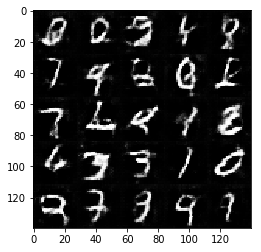

Epoch 2/2, iteration 710: Discriminator Loss: 1.0551, Generator Loss: 1.3108
Epoch 2/2, iteration 720: Discriminator Loss: 0.9961, Generator Loss: 1.0932
Epoch 2/2, iteration 730: Discriminator Loss: 1.5811, Generator Loss: 2.3189
Epoch 2/2, iteration 740: Discriminator Loss: 1.0206, Generator Loss: 1.0146
Epoch 2/2, iteration 750: Discriminator Loss: 1.1223, Generator Loss: 0.7743
Epoch 2/2, iteration 760: Discriminator Loss: 1.1814, Generator Loss: 0.7201
Epoch 2/2, iteration 770: Discriminator Loss: 1.1927, Generator Loss: 0.6787
Epoch 2/2, iteration 780: Discriminator Loss: 1.7821, Generator Loss: 0.3102
Epoch 2/2, iteration 790: Discriminator Loss: 1.0303, Generator Loss: 0.9225
Epoch 2/2, iteration 800: Discriminator Loss: 1.1058, Generator Loss: 0.8385


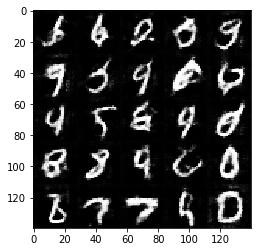

Epoch 2/2, iteration 810: Discriminator Loss: 1.1765, Generator Loss: 0.6877
Epoch 2/2, iteration 820: Discriminator Loss: 1.0322, Generator Loss: 1.3587
Epoch 2/2, iteration 830: Discriminator Loss: 1.0783, Generator Loss: 0.8818
Epoch 2/2, iteration 840: Discriminator Loss: 1.3107, Generator Loss: 0.5191
Epoch 2/2, iteration 850: Discriminator Loss: 1.1278, Generator Loss: 0.9312
Epoch 2/2, iteration 860: Discriminator Loss: 1.0372, Generator Loss: 0.9894
Epoch 2/2, iteration 870: Discriminator Loss: 1.1319, Generator Loss: 0.9755
Epoch 2/2, iteration 880: Discriminator Loss: 1.0471, Generator Loss: 1.0074
Epoch 2/2, iteration 890: Discriminator Loss: 1.5864, Generator Loss: 0.3836
Epoch 2/2, iteration 900: Discriminator Loss: 0.9988, Generator Loss: 0.9881


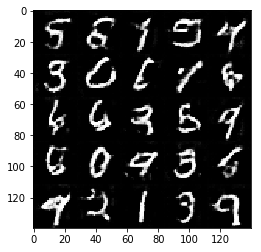

Epoch 2/2, iteration 910: Discriminator Loss: 1.0464, Generator Loss: 1.0610
Epoch 2/2, iteration 920: Discriminator Loss: 1.1386, Generator Loss: 0.7522
Epoch 2/2, iteration 930: Discriminator Loss: 1.1869, Generator Loss: 2.0880


ValueError: Parent directory of ./checkpoints/generator.ckpt doesn't exist, can't save.

In [35]:
batch_size = 128
z_dim = 128
learning_rate = 0.0002
beta1 = 0.4


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1, iteration 10: Discriminator Loss: 1.0137, Generator Loss: 16.1962
Epoch 1/1, iteration 20: Discriminator Loss: 1.5517, Generator Loss: 0.9255
Epoch 1/1, iteration 30: Discriminator Loss: 1.6598, Generator Loss: 0.6495
Epoch 1/1, iteration 40: Discriminator Loss: 1.6974, Generator Loss: 0.6213
Epoch 1/1, iteration 50: Discriminator Loss: 1.2785, Generator Loss: 1.1921
Epoch 1/1, iteration 60: Discriminator Loss: 1.3812, Generator Loss: 0.6290
Epoch 1/1, iteration 70: Discriminator Loss: 1.5138, Generator Loss: 1.9724
Epoch 1/1, iteration 80: Discriminator Loss: 1.4825, Generator Loss: 0.7594
Epoch 1/1, iteration 90: Discriminator Loss: 1.5154, Generator Loss: 0.8317
Epoch 1/1, iteration 100: Discriminator Loss: 1.4805, Generator Loss: 0.6868


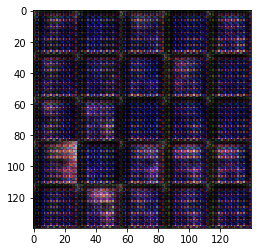

Epoch 1/1, iteration 110: Discriminator Loss: 1.4083, Generator Loss: 0.8285
Epoch 1/1, iteration 120: Discriminator Loss: 1.5614, Generator Loss: 0.6132
Epoch 1/1, iteration 130: Discriminator Loss: 1.5905, Generator Loss: 0.5085
Epoch 1/1, iteration 140: Discriminator Loss: 1.3682, Generator Loss: 0.7297
Epoch 1/1, iteration 150: Discriminator Loss: 1.4793, Generator Loss: 0.8663
Epoch 1/1, iteration 160: Discriminator Loss: 1.5035, Generator Loss: 0.9523
Epoch 1/1, iteration 170: Discriminator Loss: 1.3121, Generator Loss: 0.8457
Epoch 1/1, iteration 180: Discriminator Loss: 1.3015, Generator Loss: 0.7225
Epoch 1/1, iteration 190: Discriminator Loss: 1.4279, Generator Loss: 0.9629
Epoch 1/1, iteration 200: Discriminator Loss: 1.2847, Generator Loss: 0.8292


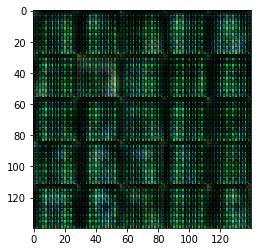

Epoch 1/1, iteration 210: Discriminator Loss: 1.5692, Generator Loss: 1.3225
Epoch 1/1, iteration 220: Discriminator Loss: 1.3694, Generator Loss: 1.0258
Epoch 1/1, iteration 230: Discriminator Loss: 1.9366, Generator Loss: 0.4496
Epoch 1/1, iteration 240: Discriminator Loss: 1.5001, Generator Loss: 0.5044
Epoch 1/1, iteration 250: Discriminator Loss: 1.3328, Generator Loss: 0.8410
Epoch 1/1, iteration 260: Discriminator Loss: 1.4096, Generator Loss: 1.2008
Epoch 1/1, iteration 270: Discriminator Loss: 1.3249, Generator Loss: 0.6235
Epoch 1/1, iteration 280: Discriminator Loss: 1.1539, Generator Loss: 0.7425
Epoch 1/1, iteration 290: Discriminator Loss: 1.5585, Generator Loss: 0.5669
Epoch 1/1, iteration 300: Discriminator Loss: 1.2924, Generator Loss: 1.0565


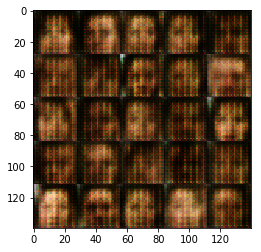

Epoch 1/1, iteration 310: Discriminator Loss: 1.4508, Generator Loss: 0.4983
Epoch 1/1, iteration 320: Discriminator Loss: 1.4545, Generator Loss: 0.9688
Epoch 1/1, iteration 330: Discriminator Loss: 1.2560, Generator Loss: 0.9217
Epoch 1/1, iteration 340: Discriminator Loss: 1.4712, Generator Loss: 0.6630
Epoch 1/1, iteration 350: Discriminator Loss: 1.3156, Generator Loss: 0.5597
Epoch 1/1, iteration 360: Discriminator Loss: 2.0163, Generator Loss: 0.2345
Epoch 1/1, iteration 370: Discriminator Loss: 1.4196, Generator Loss: 0.8841
Epoch 1/1, iteration 380: Discriminator Loss: 1.2989, Generator Loss: 0.8603
Epoch 1/1, iteration 390: Discriminator Loss: 1.3165, Generator Loss: 0.7942
Epoch 1/1, iteration 400: Discriminator Loss: 1.3261, Generator Loss: 0.7925


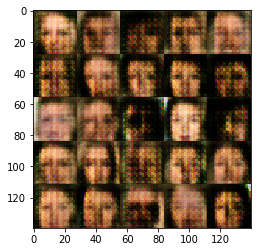

Epoch 1/1, iteration 410: Discriminator Loss: 1.3622, Generator Loss: 0.7911
Epoch 1/1, iteration 420: Discriminator Loss: 1.4093, Generator Loss: 0.7237
Epoch 1/1, iteration 430: Discriminator Loss: 1.1870, Generator Loss: 1.3510
Epoch 1/1, iteration 440: Discriminator Loss: 1.2130, Generator Loss: 0.5763
Epoch 1/1, iteration 450: Discriminator Loss: 1.4489, Generator Loss: 0.7685
Epoch 1/1, iteration 460: Discriminator Loss: 1.9464, Generator Loss: 0.2474
Epoch 1/1, iteration 470: Discriminator Loss: 1.3869, Generator Loss: 0.7036
Epoch 1/1, iteration 480: Discriminator Loss: 1.4302, Generator Loss: 0.5494
Epoch 1/1, iteration 490: Discriminator Loss: 1.4517, Generator Loss: 1.6085
Epoch 1/1, iteration 500: Discriminator Loss: 1.3749, Generator Loss: 0.6989


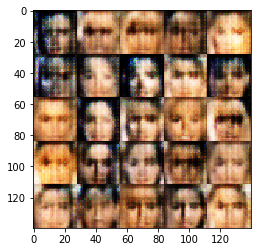

Epoch 1/1, iteration 510: Discriminator Loss: 1.2607, Generator Loss: 0.9329
Epoch 1/1, iteration 520: Discriminator Loss: 1.6514, Generator Loss: 0.6186
Epoch 1/1, iteration 530: Discriminator Loss: 1.1481, Generator Loss: 1.7202
Epoch 1/1, iteration 540: Discriminator Loss: 1.7341, Generator Loss: 0.6914
Epoch 1/1, iteration 550: Discriminator Loss: 1.2384, Generator Loss: 0.9376
Epoch 1/1, iteration 560: Discriminator Loss: 1.4040, Generator Loss: 0.7250
Epoch 1/1, iteration 570: Discriminator Loss: 1.2544, Generator Loss: 0.8086
Epoch 1/1, iteration 580: Discriminator Loss: 1.3752, Generator Loss: 0.6840
Epoch 1/1, iteration 590: Discriminator Loss: 1.2783, Generator Loss: 0.6445
Epoch 1/1, iteration 600: Discriminator Loss: 1.3131, Generator Loss: 1.0322


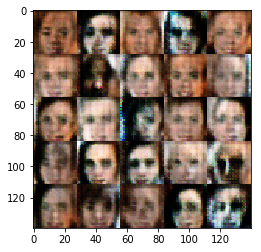

Epoch 1/1, iteration 610: Discriminator Loss: 1.1578, Generator Loss: 1.3778
Epoch 1/1, iteration 620: Discriminator Loss: 1.4779, Generator Loss: 0.7338
Epoch 1/1, iteration 630: Discriminator Loss: 1.3468, Generator Loss: 0.7431
Epoch 1/1, iteration 640: Discriminator Loss: 1.4116, Generator Loss: 0.6209
Epoch 1/1, iteration 650: Discriminator Loss: 1.3209, Generator Loss: 0.8825
Epoch 1/1, iteration 660: Discriminator Loss: 1.5444, Generator Loss: 0.7759
Epoch 1/1, iteration 670: Discriminator Loss: 1.2620, Generator Loss: 0.7636
Epoch 1/1, iteration 680: Discriminator Loss: 1.2783, Generator Loss: 0.8510
Epoch 1/1, iteration 690: Discriminator Loss: 1.4504, Generator Loss: 0.6988
Epoch 1/1, iteration 700: Discriminator Loss: 1.1599, Generator Loss: 1.4740


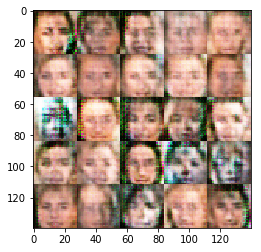

Epoch 1/1, iteration 710: Discriminator Loss: 1.3511, Generator Loss: 0.9965
Epoch 1/1, iteration 720: Discriminator Loss: 1.3585, Generator Loss: 0.9429
Epoch 1/1, iteration 730: Discriminator Loss: 1.1721, Generator Loss: 0.8520
Epoch 1/1, iteration 740: Discriminator Loss: 1.3036, Generator Loss: 1.0629
Epoch 1/1, iteration 750: Discriminator Loss: 1.4508, Generator Loss: 0.6936
Epoch 1/1, iteration 760: Discriminator Loss: 1.4037, Generator Loss: 1.2586
Epoch 1/1, iteration 770: Discriminator Loss: 0.9295, Generator Loss: 1.1793
Epoch 1/1, iteration 780: Discriminator Loss: 1.6170, Generator Loss: 0.4911
Epoch 1/1, iteration 790: Discriminator Loss: 1.3774, Generator Loss: 0.7407
Epoch 1/1, iteration 800: Discriminator Loss: 1.2093, Generator Loss: 1.2370


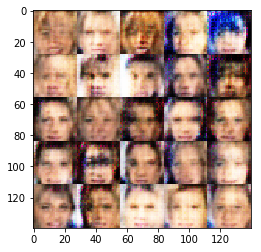

Epoch 1/1, iteration 810: Discriminator Loss: 1.1761, Generator Loss: 0.9374
Epoch 1/1, iteration 820: Discriminator Loss: 1.1937, Generator Loss: 1.0186
Epoch 1/1, iteration 830: Discriminator Loss: 1.3244, Generator Loss: 0.7496
Epoch 1/1, iteration 840: Discriminator Loss: 1.3612, Generator Loss: 1.4383
Epoch 1/1, iteration 850: Discriminator Loss: 1.3826, Generator Loss: 0.7924
Epoch 1/1, iteration 860: Discriminator Loss: 1.8703, Generator Loss: 2.3040
Epoch 1/1, iteration 870: Discriminator Loss: 1.4277, Generator Loss: 0.5849
Epoch 1/1, iteration 880: Discriminator Loss: 1.3142, Generator Loss: 1.1350
Epoch 1/1, iteration 890: Discriminator Loss: 1.3590, Generator Loss: 1.3994
Epoch 1/1, iteration 900: Discriminator Loss: 1.3328, Generator Loss: 0.6497


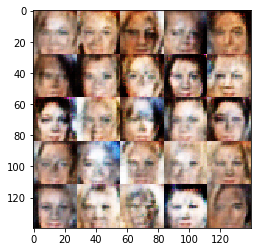

Epoch 1/1, iteration 910: Discriminator Loss: 1.3835, Generator Loss: 0.7357
Epoch 1/1, iteration 920: Discriminator Loss: 1.4064, Generator Loss: 0.5300
Epoch 1/1, iteration 930: Discriminator Loss: 1.3996, Generator Loss: 0.5626
Epoch 1/1, iteration 940: Discriminator Loss: 1.5596, Generator Loss: 1.5747
Epoch 1/1, iteration 950: Discriminator Loss: 1.0525, Generator Loss: 1.0691
Epoch 1/1, iteration 960: Discriminator Loss: 1.5007, Generator Loss: 0.6365
Epoch 1/1, iteration 970: Discriminator Loss: 1.2877, Generator Loss: 0.8398
Epoch 1/1, iteration 980: Discriminator Loss: 1.3721, Generator Loss: 0.5672
Epoch 1/1, iteration 990: Discriminator Loss: 1.3364, Generator Loss: 0.7322
Epoch 1/1, iteration 1000: Discriminator Loss: 1.4919, Generator Loss: 0.6415


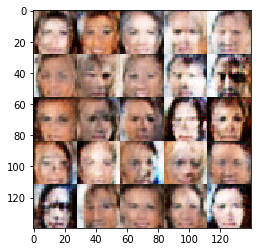

Epoch 1/1, iteration 1010: Discriminator Loss: 1.4061, Generator Loss: 0.5017
Epoch 1/1, iteration 1020: Discriminator Loss: 1.3528, Generator Loss: 0.5967
Epoch 1/1, iteration 1030: Discriminator Loss: 1.3475, Generator Loss: 1.3151
Epoch 1/1, iteration 1040: Discriminator Loss: 1.4220, Generator Loss: 0.7786
Epoch 1/1, iteration 1050: Discriminator Loss: 1.3325, Generator Loss: 0.8712
Epoch 1/1, iteration 1060: Discriminator Loss: 1.4660, Generator Loss: 0.6229
Epoch 1/1, iteration 1070: Discriminator Loss: 1.2775, Generator Loss: 0.9102
Epoch 1/1, iteration 1080: Discriminator Loss: 1.3508, Generator Loss: 0.8868
Epoch 1/1, iteration 1090: Discriminator Loss: 1.3967, Generator Loss: 0.6169
Epoch 1/1, iteration 1100: Discriminator Loss: 1.3175, Generator Loss: 0.9082


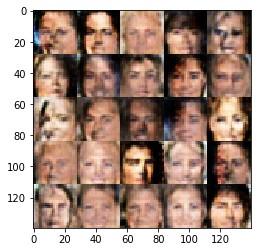

Epoch 1/1, iteration 1110: Discriminator Loss: 1.4832, Generator Loss: 0.5052
Epoch 1/1, iteration 1120: Discriminator Loss: 1.3781, Generator Loss: 0.5936
Epoch 1/1, iteration 1130: Discriminator Loss: 1.4125, Generator Loss: 1.1802
Epoch 1/1, iteration 1140: Discriminator Loss: 1.2614, Generator Loss: 1.0864
Epoch 1/1, iteration 1150: Discriminator Loss: 1.4624, Generator Loss: 1.0232
Epoch 1/1, iteration 1160: Discriminator Loss: 1.4095, Generator Loss: 0.6607
Epoch 1/1, iteration 1170: Discriminator Loss: 1.3580, Generator Loss: 0.6076
Epoch 1/1, iteration 1180: Discriminator Loss: 1.3702, Generator Loss: 1.1073
Epoch 1/1, iteration 1190: Discriminator Loss: 1.3252, Generator Loss: 0.7636
Epoch 1/1, iteration 1200: Discriminator Loss: 1.3475, Generator Loss: 0.7035


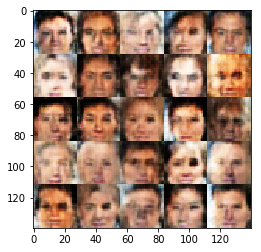

Epoch 1/1, iteration 1210: Discriminator Loss: 1.3417, Generator Loss: 0.6973
Epoch 1/1, iteration 1220: Discriminator Loss: 1.4064, Generator Loss: 1.1778
Epoch 1/1, iteration 1230: Discriminator Loss: 1.3745, Generator Loss: 0.7541
Epoch 1/1, iteration 1240: Discriminator Loss: 1.3438, Generator Loss: 0.9166
Epoch 1/1, iteration 1250: Discriminator Loss: 1.2814, Generator Loss: 0.6928
Epoch 1/1, iteration 1260: Discriminator Loss: 1.3128, Generator Loss: 0.7537
Epoch 1/1, iteration 1270: Discriminator Loss: 1.3120, Generator Loss: 0.7413
Epoch 1/1, iteration 1280: Discriminator Loss: 1.3560, Generator Loss: 0.6796
Epoch 1/1, iteration 1290: Discriminator Loss: 1.7673, Generator Loss: 0.3059
Epoch 1/1, iteration 1300: Discriminator Loss: 1.5044, Generator Loss: 0.6086


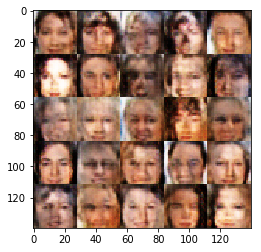

Epoch 1/1, iteration 1310: Discriminator Loss: 1.4639, Generator Loss: 0.6743
Epoch 1/1, iteration 1320: Discriminator Loss: 1.4373, Generator Loss: 0.7175
Epoch 1/1, iteration 1330: Discriminator Loss: 1.4233, Generator Loss: 0.6987
Epoch 1/1, iteration 1340: Discriminator Loss: 1.3198, Generator Loss: 0.8307
Epoch 1/1, iteration 1350: Discriminator Loss: 1.3560, Generator Loss: 0.8406
Epoch 1/1, iteration 1360: Discriminator Loss: 1.3856, Generator Loss: 0.8386
Epoch 1/1, iteration 1370: Discriminator Loss: 1.3755, Generator Loss: 0.9254
Epoch 1/1, iteration 1380: Discriminator Loss: 1.3778, Generator Loss: 0.8612
Epoch 1/1, iteration 1390: Discriminator Loss: 1.2699, Generator Loss: 0.8500
Epoch 1/1, iteration 1400: Discriminator Loss: 1.4338, Generator Loss: 0.9085


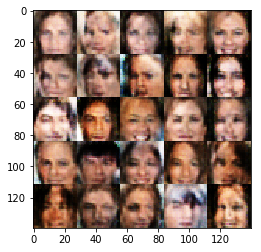

Epoch 1/1, iteration 1410: Discriminator Loss: 1.4604, Generator Loss: 0.6857
Epoch 1/1, iteration 1420: Discriminator Loss: 1.3320, Generator Loss: 0.9930
Epoch 1/1, iteration 1430: Discriminator Loss: 1.2772, Generator Loss: 0.8609
Epoch 1/1, iteration 1440: Discriminator Loss: 1.4221, Generator Loss: 0.8337
Epoch 1/1, iteration 1450: Discriminator Loss: 1.3425, Generator Loss: 0.8416
Epoch 1/1, iteration 1460: Discriminator Loss: 1.3368, Generator Loss: 0.7363
Epoch 1/1, iteration 1470: Discriminator Loss: 1.2661, Generator Loss: 0.8263
Epoch 1/1, iteration 1480: Discriminator Loss: 1.3083, Generator Loss: 0.8734
Epoch 1/1, iteration 1490: Discriminator Loss: 1.3260, Generator Loss: 1.2577
Epoch 1/1, iteration 1500: Discriminator Loss: 1.3697, Generator Loss: 0.9115


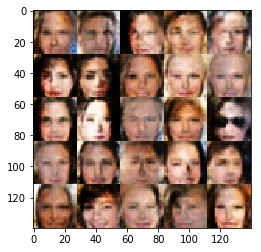

Epoch 1/1, iteration 1510: Discriminator Loss: 1.3898, Generator Loss: 1.0045
Epoch 1/1, iteration 1520: Discriminator Loss: 1.3691, Generator Loss: 0.8526
Epoch 1/1, iteration 1530: Discriminator Loss: 1.3007, Generator Loss: 0.8193
Epoch 1/1, iteration 1540: Discriminator Loss: 1.3953, Generator Loss: 1.0142
Epoch 1/1, iteration 1550: Discriminator Loss: 1.4066, Generator Loss: 0.7977
Epoch 1/1, iteration 1560: Discriminator Loss: 1.2849, Generator Loss: 0.6454
Epoch 1/1, iteration 1570: Discriminator Loss: 1.3800, Generator Loss: 0.8972
Epoch 1/1, iteration 1580: Discriminator Loss: 1.4459, Generator Loss: 0.5529
Epoch 1/1, iteration 1590: Discriminator Loss: 1.5513, Generator Loss: 0.7618
Epoch 1/1, iteration 1600: Discriminator Loss: 1.3692, Generator Loss: 0.6965


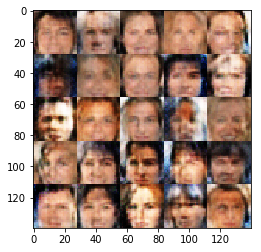

Epoch 1/1, iteration 1610: Discriminator Loss: 1.3195, Generator Loss: 0.6123
Epoch 1/1, iteration 1620: Discriminator Loss: 1.3766, Generator Loss: 0.9637
Epoch 1/1, iteration 1630: Discriminator Loss: 1.3599, Generator Loss: 0.8804
Epoch 1/1, iteration 1640: Discriminator Loss: 1.3176, Generator Loss: 0.6600
Epoch 1/1, iteration 1650: Discriminator Loss: 1.3449, Generator Loss: 0.7167
Epoch 1/1, iteration 1660: Discriminator Loss: 1.3899, Generator Loss: 0.7863
Epoch 1/1, iteration 1670: Discriminator Loss: 1.3679, Generator Loss: 1.2344
Epoch 1/1, iteration 1680: Discriminator Loss: 1.4306, Generator Loss: 0.9257
Epoch 1/1, iteration 1690: Discriminator Loss: 1.3272, Generator Loss: 0.8746
Epoch 1/1, iteration 1700: Discriminator Loss: 1.3511, Generator Loss: 0.8648


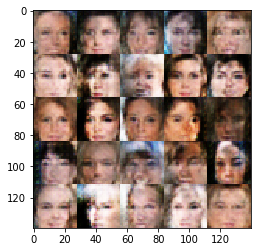

Epoch 1/1, iteration 1710: Discriminator Loss: 1.3960, Generator Loss: 0.5611
Epoch 1/1, iteration 1720: Discriminator Loss: 1.3724, Generator Loss: 0.7504
Epoch 1/1, iteration 1730: Discriminator Loss: 1.3401, Generator Loss: 0.8360
Epoch 1/1, iteration 1740: Discriminator Loss: 1.2900, Generator Loss: 1.0114
Epoch 1/1, iteration 1750: Discriminator Loss: 1.3756, Generator Loss: 0.8855
Epoch 1/1, iteration 1760: Discriminator Loss: 1.4114, Generator Loss: 0.7862
Epoch 1/1, iteration 1770: Discriminator Loss: 1.3683, Generator Loss: 0.5886
Epoch 1/1, iteration 1780: Discriminator Loss: 1.4128, Generator Loss: 0.5725
Epoch 1/1, iteration 1790: Discriminator Loss: 1.3889, Generator Loss: 0.7722
Epoch 1/1, iteration 1800: Discriminator Loss: 1.4249, Generator Loss: 0.6825


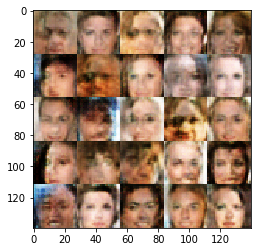

Epoch 1/1, iteration 1810: Discriminator Loss: 1.3667, Generator Loss: 0.7741
Epoch 1/1, iteration 1820: Discriminator Loss: 1.3690, Generator Loss: 1.1801
Epoch 1/1, iteration 1830: Discriminator Loss: 1.3282, Generator Loss: 0.6060
Epoch 1/1, iteration 1840: Discriminator Loss: 1.4594, Generator Loss: 1.0658
Epoch 1/1, iteration 1850: Discriminator Loss: 1.3451, Generator Loss: 0.6990
Epoch 1/1, iteration 1860: Discriminator Loss: 1.3059, Generator Loss: 0.7078
Epoch 1/1, iteration 1870: Discriminator Loss: 1.5285, Generator Loss: 0.5348
Epoch 1/1, iteration 1880: Discriminator Loss: 1.4662, Generator Loss: 0.8942
Epoch 1/1, iteration 1890: Discriminator Loss: 1.5604, Generator Loss: 0.5147
Epoch 1/1, iteration 1900: Discriminator Loss: 1.3489, Generator Loss: 1.0641


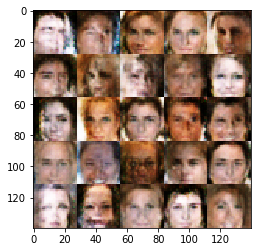

Epoch 1/1, iteration 1910: Discriminator Loss: 1.3844, Generator Loss: 1.2135
Epoch 1/1, iteration 1920: Discriminator Loss: 1.3716, Generator Loss: 0.9191
Epoch 1/1, iteration 1930: Discriminator Loss: 1.3056, Generator Loss: 0.9770
Epoch 1/1, iteration 1940: Discriminator Loss: 1.5925, Generator Loss: 0.4380
Epoch 1/1, iteration 1950: Discriminator Loss: 1.3378, Generator Loss: 0.8262
Epoch 1/1, iteration 1960: Discriminator Loss: 1.2954, Generator Loss: 0.6576
Epoch 1/1, iteration 1970: Discriminator Loss: 1.3978, Generator Loss: 0.8019
Epoch 1/1, iteration 1980: Discriminator Loss: 1.2841, Generator Loss: 0.8021
Epoch 1/1, iteration 1990: Discriminator Loss: 1.3060, Generator Loss: 0.7458
Epoch 1/1, iteration 2000: Discriminator Loss: 1.3865, Generator Loss: 0.8082


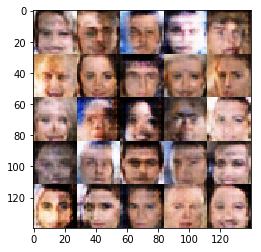

Epoch 1/1, iteration 2010: Discriminator Loss: 1.2543, Generator Loss: 0.6919
Epoch 1/1, iteration 2020: Discriminator Loss: 1.3832, Generator Loss: 0.9700
Epoch 1/1, iteration 2030: Discriminator Loss: 1.3247, Generator Loss: 0.6139
Epoch 1/1, iteration 2040: Discriminator Loss: 1.3751, Generator Loss: 0.8739
Epoch 1/1, iteration 2050: Discriminator Loss: 1.4484, Generator Loss: 1.0600
Epoch 1/1, iteration 2060: Discriminator Loss: 1.3221, Generator Loss: 0.7123
Epoch 1/1, iteration 2070: Discriminator Loss: 1.4247, Generator Loss: 1.0787
Epoch 1/1, iteration 2080: Discriminator Loss: 1.3697, Generator Loss: 0.8299
Epoch 1/1, iteration 2090: Discriminator Loss: 1.3818, Generator Loss: 1.0265
Epoch 1/1, iteration 2100: Discriminator Loss: 1.3482, Generator Loss: 0.9944


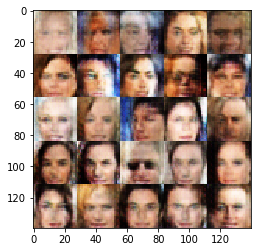

Epoch 1/1, iteration 2110: Discriminator Loss: 1.4285, Generator Loss: 0.9707
Epoch 1/1, iteration 2120: Discriminator Loss: 1.3227, Generator Loss: 0.7255
Epoch 1/1, iteration 2130: Discriminator Loss: 1.2365, Generator Loss: 0.9178
Epoch 1/1, iteration 2140: Discriminator Loss: 1.5247, Generator Loss: 0.9869
Epoch 1/1, iteration 2150: Discriminator Loss: 1.2264, Generator Loss: 0.7047
Epoch 1/1, iteration 2160: Discriminator Loss: 1.3223, Generator Loss: 1.0085
Epoch 1/1, iteration 2170: Discriminator Loss: 1.3798, Generator Loss: 0.8450
Epoch 1/1, iteration 2180: Discriminator Loss: 1.2649, Generator Loss: 0.8118
Epoch 1/1, iteration 2190: Discriminator Loss: 1.1570, Generator Loss: 0.6515
Epoch 1/1, iteration 2200: Discriminator Loss: 1.5001, Generator Loss: 1.0850


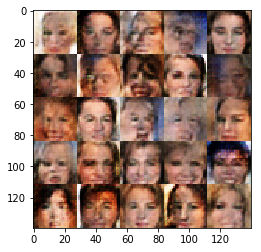

Epoch 1/1, iteration 2210: Discriminator Loss: 1.6169, Generator Loss: 0.4382
Epoch 1/1, iteration 2220: Discriminator Loss: 1.4099, Generator Loss: 0.8156
Epoch 1/1, iteration 2230: Discriminator Loss: 1.4906, Generator Loss: 0.9610
Epoch 1/1, iteration 2240: Discriminator Loss: 1.3627, Generator Loss: 0.9753
Epoch 1/1, iteration 2250: Discriminator Loss: 1.3394, Generator Loss: 0.7825
Epoch 1/1, iteration 2260: Discriminator Loss: 1.3309, Generator Loss: 0.9463
Epoch 1/1, iteration 2270: Discriminator Loss: 1.4343, Generator Loss: 1.1524
Epoch 1/1, iteration 2280: Discriminator Loss: 1.2967, Generator Loss: 0.8104
Epoch 1/1, iteration 2290: Discriminator Loss: 1.3758, Generator Loss: 0.9547
Epoch 1/1, iteration 2300: Discriminator Loss: 1.3438, Generator Loss: 0.7252


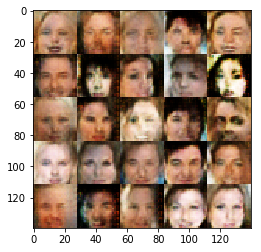

Epoch 1/1, iteration 2310: Discriminator Loss: 1.3276, Generator Loss: 0.8123
Epoch 1/1, iteration 2320: Discriminator Loss: 1.4093, Generator Loss: 0.9969
Epoch 1/1, iteration 2330: Discriminator Loss: 1.3641, Generator Loss: 0.9244
Epoch 1/1, iteration 2340: Discriminator Loss: 1.4884, Generator Loss: 0.5428
Epoch 1/1, iteration 2350: Discriminator Loss: 1.2840, Generator Loss: 0.7766
Epoch 1/1, iteration 2360: Discriminator Loss: 1.3724, Generator Loss: 0.7651
Epoch 1/1, iteration 2370: Discriminator Loss: 1.4023, Generator Loss: 0.6320
Epoch 1/1, iteration 2380: Discriminator Loss: 1.3736, Generator Loss: 0.7786
Epoch 1/1, iteration 2390: Discriminator Loss: 1.5119, Generator Loss: 1.3014
Epoch 1/1, iteration 2400: Discriminator Loss: 1.3436, Generator Loss: 0.8301


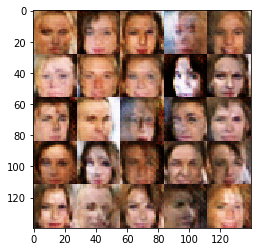

Epoch 1/1, iteration 2410: Discriminator Loss: 1.4402, Generator Loss: 0.7359
Epoch 1/1, iteration 2420: Discriminator Loss: 1.3145, Generator Loss: 0.9244
Epoch 1/1, iteration 2430: Discriminator Loss: 1.3401, Generator Loss: 0.6911
Epoch 1/1, iteration 2440: Discriminator Loss: 1.3171, Generator Loss: 0.7105
Epoch 1/1, iteration 2450: Discriminator Loss: 1.3545, Generator Loss: 0.6911
Epoch 1/1, iteration 2460: Discriminator Loss: 1.2278, Generator Loss: 0.8380
Epoch 1/1, iteration 2470: Discriminator Loss: 1.1659, Generator Loss: 0.6850
Epoch 1/1, iteration 2480: Discriminator Loss: 1.2984, Generator Loss: 0.9252
Epoch 1/1, iteration 2490: Discriminator Loss: 1.3749, Generator Loss: 1.1566
Epoch 1/1, iteration 2500: Discriminator Loss: 1.4190, Generator Loss: 0.7710


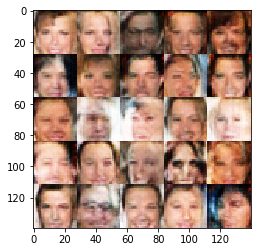

Epoch 1/1, iteration 2510: Discriminator Loss: 1.2708, Generator Loss: 0.9377
Epoch 1/1, iteration 2520: Discriminator Loss: 1.3199, Generator Loss: 0.8971
Epoch 1/1, iteration 2530: Discriminator Loss: 1.3498, Generator Loss: 1.0746
Epoch 1/1, iteration 2540: Discriminator Loss: 1.2944, Generator Loss: 0.8921
Epoch 1/1, iteration 2550: Discriminator Loss: 1.4125, Generator Loss: 0.7447
Epoch 1/1, iteration 2560: Discriminator Loss: 1.3385, Generator Loss: 0.8553
Epoch 1/1, iteration 2570: Discriminator Loss: 1.3567, Generator Loss: 0.7326
Epoch 1/1, iteration 2580: Discriminator Loss: 1.3687, Generator Loss: 0.9822
Epoch 1/1, iteration 2590: Discriminator Loss: 1.3364, Generator Loss: 0.8528
Epoch 1/1, iteration 2600: Discriminator Loss: 1.2988, Generator Loss: 0.8493


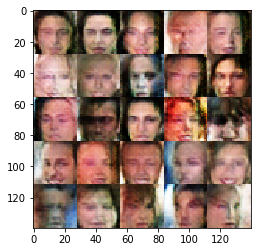

Epoch 1/1, iteration 2610: Discriminator Loss: 1.3429, Generator Loss: 0.8584
Epoch 1/1, iteration 2620: Discriminator Loss: 1.2886, Generator Loss: 0.8631
Epoch 1/1, iteration 2630: Discriminator Loss: 1.2704, Generator Loss: 0.7878
Epoch 1/1, iteration 2640: Discriminator Loss: 1.2942, Generator Loss: 1.0542
Epoch 1/1, iteration 2650: Discriminator Loss: 1.3176, Generator Loss: 1.1166
Epoch 1/1, iteration 2660: Discriminator Loss: 1.3209, Generator Loss: 0.7999
Epoch 1/1, iteration 2670: Discriminator Loss: 1.2109, Generator Loss: 0.8070
Epoch 1/1, iteration 2680: Discriminator Loss: 1.3982, Generator Loss: 0.8062
Epoch 1/1, iteration 2690: Discriminator Loss: 1.3405, Generator Loss: 0.8419
Epoch 1/1, iteration 2700: Discriminator Loss: 1.3968, Generator Loss: 0.8290


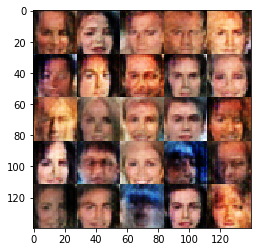

Epoch 1/1, iteration 2710: Discriminator Loss: 1.4023, Generator Loss: 0.7343
Epoch 1/1, iteration 2720: Discriminator Loss: 1.3018, Generator Loss: 0.7700
Epoch 1/1, iteration 2730: Discriminator Loss: 1.3479, Generator Loss: 0.6627
Epoch 1/1, iteration 2740: Discriminator Loss: 1.4113, Generator Loss: 0.7796
Epoch 1/1, iteration 2750: Discriminator Loss: 1.2932, Generator Loss: 0.7244
Epoch 1/1, iteration 2760: Discriminator Loss: 1.3723, Generator Loss: 0.8074
Epoch 1/1, iteration 2770: Discriminator Loss: 1.2905, Generator Loss: 1.0616
Epoch 1/1, iteration 2780: Discriminator Loss: 1.2866, Generator Loss: 0.7892
Epoch 1/1, iteration 2790: Discriminator Loss: 1.2712, Generator Loss: 0.6651
Epoch 1/1, iteration 2800: Discriminator Loss: 1.3275, Generator Loss: 0.9277


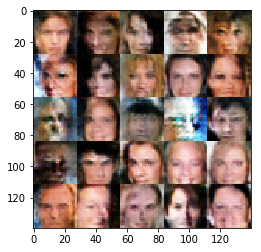

Epoch 1/1, iteration 2810: Discriminator Loss: 1.3680, Generator Loss: 1.0702
Epoch 1/1, iteration 2820: Discriminator Loss: 1.2488, Generator Loss: 0.6670
Epoch 1/1, iteration 2830: Discriminator Loss: 1.3974, Generator Loss: 0.6370
Epoch 1/1, iteration 2840: Discriminator Loss: 1.4544, Generator Loss: 0.7793
Epoch 1/1, iteration 2850: Discriminator Loss: 1.1951, Generator Loss: 0.6600
Epoch 1/1, iteration 2860: Discriminator Loss: 1.2826, Generator Loss: 0.7943
Epoch 1/1, iteration 2870: Discriminator Loss: 1.6197, Generator Loss: 0.4779
Epoch 1/1, iteration 2880: Discriminator Loss: 1.5079, Generator Loss: 0.6538
Epoch 1/1, iteration 2890: Discriminator Loss: 1.3916, Generator Loss: 0.9910
Epoch 1/1, iteration 2900: Discriminator Loss: 1.3064, Generator Loss: 0.6381


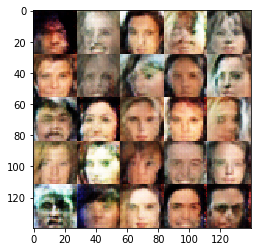

Epoch 1/1, iteration 2910: Discriminator Loss: 1.2738, Generator Loss: 0.9237
Epoch 1/1, iteration 2920: Discriminator Loss: 1.3140, Generator Loss: 0.7928
Epoch 1/1, iteration 2930: Discriminator Loss: 1.3119, Generator Loss: 0.7631
Epoch 1/1, iteration 2940: Discriminator Loss: 1.3632, Generator Loss: 1.1123
Epoch 1/1, iteration 2950: Discriminator Loss: 1.2508, Generator Loss: 0.6724
Epoch 1/1, iteration 2960: Discriminator Loss: 1.3979, Generator Loss: 0.8781
Epoch 1/1, iteration 2970: Discriminator Loss: 1.3864, Generator Loss: 0.6374
Epoch 1/1, iteration 2980: Discriminator Loss: 1.3492, Generator Loss: 0.8354
Epoch 1/1, iteration 2990: Discriminator Loss: 1.2665, Generator Loss: 0.8722
Epoch 1/1, iteration 3000: Discriminator Loss: 1.2675, Generator Loss: 0.6052


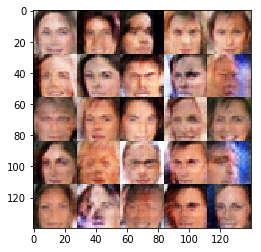

Epoch 1/1, iteration 3010: Discriminator Loss: 1.4539, Generator Loss: 0.5969
Epoch 1/1, iteration 3020: Discriminator Loss: 1.3449, Generator Loss: 0.9912
Epoch 1/1, iteration 3030: Discriminator Loss: 1.4680, Generator Loss: 1.0472
Epoch 1/1, iteration 3040: Discriminator Loss: 1.2754, Generator Loss: 0.8247
Epoch 1/1, iteration 3050: Discriminator Loss: 1.3729, Generator Loss: 0.9417
Epoch 1/1, iteration 3060: Discriminator Loss: 1.3019, Generator Loss: 0.8538
Epoch 1/1, iteration 3070: Discriminator Loss: 1.4077, Generator Loss: 0.7924
Epoch 1/1, iteration 3080: Discriminator Loss: 1.3422, Generator Loss: 0.7696
Epoch 1/1, iteration 3090: Discriminator Loss: 1.2468, Generator Loss: 0.6613
Epoch 1/1, iteration 3100: Discriminator Loss: 1.2307, Generator Loss: 0.6828


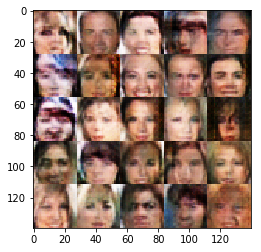

Epoch 1/1, iteration 3110: Discriminator Loss: 1.2987, Generator Loss: 1.0325
Epoch 1/1, iteration 3120: Discriminator Loss: 1.4131, Generator Loss: 0.7881
Epoch 1/1, iteration 3130: Discriminator Loss: 1.3744, Generator Loss: 0.7139
Epoch 1/1, iteration 3140: Discriminator Loss: 1.5168, Generator Loss: 0.5497
Epoch 1/1, iteration 3150: Discriminator Loss: 1.4568, Generator Loss: 0.6384
Epoch 1/1, iteration 3160: Discriminator Loss: 1.3458, Generator Loss: 0.7054


ValueError: Parent directory of ./checkpoints/generator.ckpt doesn't exist, can't save.

In [36]:
batch_size = 64
z_dim = 100
learning_rate = 0.001
beta1 = 0.4


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.